In [74]:
import numpy as np
from scipy.integrate import odeint, ode
import matplotlib.pyplot as plt
from matplotlib import rcParams
import ipywidgets as widgets
%matplotlib inline

rcParams['figure.figsize'] = [15,5]

In [75]:
def plotFergulst(N0,mu,k):
    
    model = lambda N,t,mu,k: mu * N * (k - N)
    
    t = np.linspace(0, 12, 1000)
    
    N = odeint(model, N0, t, args=(mu, k))

    plt.plot(t, N)
    plt.xlabel('t', fontsize=15)
    plt.ylabel('N(t)', fontsize=15)
    plt.grid()
    plt.xlim(0,12)
    plt.ylim(2,20)
    plt.show()

In [82]:
def plotSolou(k0,s,a,mu,q,alpha):
    def model(k, t, s, a, mu, q, alpha):
        dydt = s * a * k**alpha - (mu + q) * k
        return dydt

    t = np.linspace(0, 40, 100)

    k = odeint(model, k0, t, args=(s, a, mu, q, alpha))

    plt.plot(t, k)
    plt.xlabel('t')
    plt.ylabel('k(t)')
    plt.grid()
    plt.xlim(0,40)
    plt.ylim(0,4)
    plt.show()

### модель Фергюльста динаміки росту популяцій

## $$\dot{N} = \mu N (k - N)$$

In [76]:
widgets.interact(plotFergulst,N0=(1,10),mu=(0.01,1),k=(1,30))

interactive(children=(IntSlider(value=5, description='N0', max=10, min=1), FloatSlider(value=0.505, description='mu', max=1.0, min=0.01), IntSlider(value=15, description='k', max=30, min=1), Output()), _dom_classes=('widget-interact',))

<function __main__.plotFergulst>

## Односекторна модель економічної динаміки Солоу 

### $$\dot{k} = sak^{\alpha} - (\mu + q)k$$

In [13]:
# parameters
k0 = 0.001
s = 0.2
a = 2.5
mu = 0.1
q = 0.1
alpha = 0.3

In [81]:
widgets.interact(plotSolou,k0=(0.001,0.5),s=(0.1,1),a=(2.5,5),mu=(0.01,1),q=(0.01,1),alpha=(0,1.))

interactive(children=(FloatSlider(value=0.2505, description='k0', max=0.5, min=0.001), FloatSlider(value=0.55, description='s', max=1.0, min=0.1), FloatSlider(value=3.75, description='a', max=5.0, min=2.5), FloatSlider(value=0.505, description='mu', max=1.0, min=0.01), FloatSlider(value=0.505, description='q', max=1.0, min=0.01), FloatSlider(value=0.5, description='alpha', max=1.0), Output()), _dom_classes=('widget-interact',))

<function __main__.plotSolou>

# 3. Рівняння вимушених коливань

### $\ddot{x} + 2 \delta \dot{x} + \omega_0^2 x = f_0 \cos \omega t$

In [17]:
# parameters
x0 = 1
x0_prime = -0.5
delta = 0.1
# omega0 = 1 * math.pi
omega0 = 0.5
f0 = 1
omega = np.sqrt(omega0**2 - 2 * delta**2)

In [18]:
# parameters
x0 = 1
x0_prime = -0.5
delta = 0.01
omega0 = 0.7 * np.pi
f0 = 1
omega = np.sqrt(omega0**2 - 2 * delta**2)

In [20]:
def model(X, t, delta, omega0, f0, omega):
    return [X[1], f0 * np.cos(omega * t) - omega0**2 * X[0] - 2 * delta * X[1]]

# time points
t = np.linspace(0, 80, 20000)

# solve ODE
x = odeint(model, [x0, x0_prime], t, args=(delta, omega0, f0, omega))

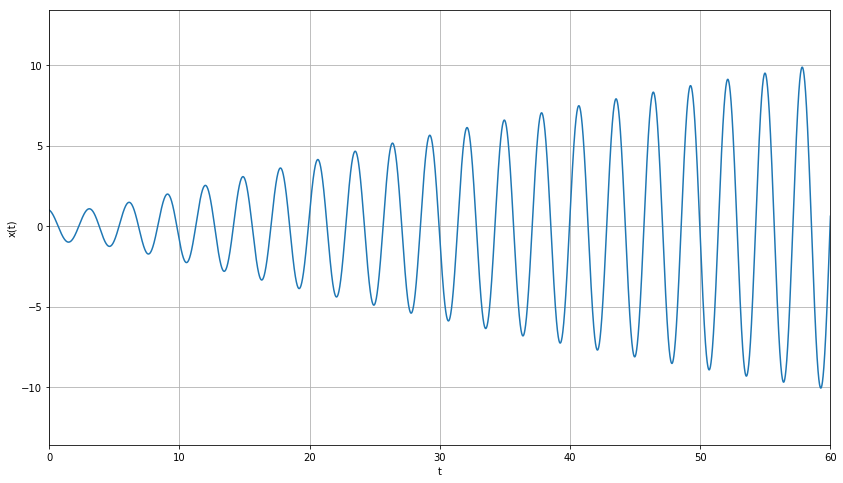

In [23]:
# plot results
plt.figure(figsize=(14, 8))
plt.plot(t, x[:, 0])
plt.xlabel('t')
plt.ylabel('x(t)')
plt.grid()
plt.xlim(0,60)
plt.show()

In [32]:
pallette = res

(-30, 30)

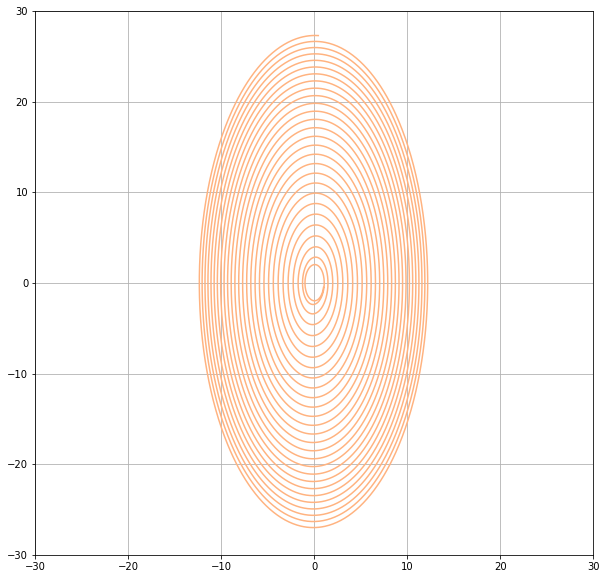

In [52]:
f,ax = plt.subplots(1,1,figsize=(10,10))

ax.plot(x[:, 0], x[:, 1],c=(1,0.7,0.5))
ax.grid()
ax.set_xlim(-30,30)
ax.set_ylim(-30,30)

# 4. Рівняння коливань у системі «хижак-жертва»

$\displaystyle\left\{ \begin{array}{ll} \dot{x} = (\alpha_x y - \beta_x)x \space \space | \space x_0 \\ \dot{y} = (\alpha_y - \beta_y x)y \space \space | \space y_0 \end{array} \right. $

### Стаціонарна точка: $x^* = \frac{\alpha_y}{\beta_y}; \space y^* = \frac{\beta_x}{\alpha_x}$

In [53]:
# parameters
# x0 = 2000
# y0 = 5000
alpha_x = 0.0015
beta_x = 10
alpha_y = 100
beta_y = 0.01
y0 = beta_x / alpha_x + 100000
x0 = alpha_y / beta_y + 1000

In [54]:
def model(X, t, alpha_x, beta_x, alpha_y, beta_y):
    return [(alpha_x * X[1] - beta_x) * X[0], (alpha_y - beta_y * X[0]) * X[1]]

# time points
t = np.linspace(0, 1, 5000)

# solve ODE
x = odeint(model, [x0, y0], t, args=(alpha_x, beta_x, alpha_y, beta_y))

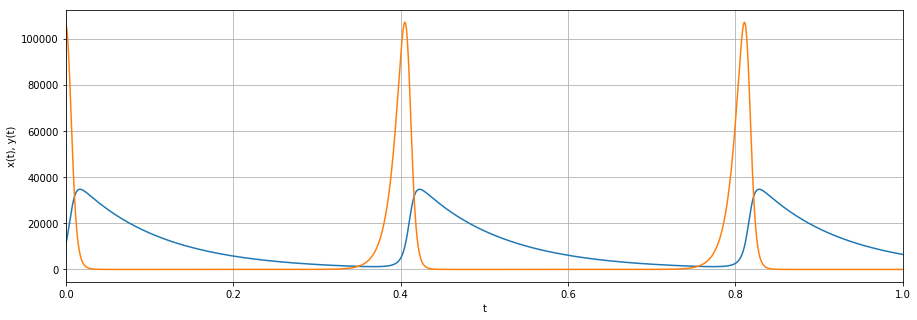

In [61]:
plt.plot(t, x)
plt.xlabel('t')
plt.ylabel('x(t), y(t)')
plt.xlim(0,1)
plt.grid()

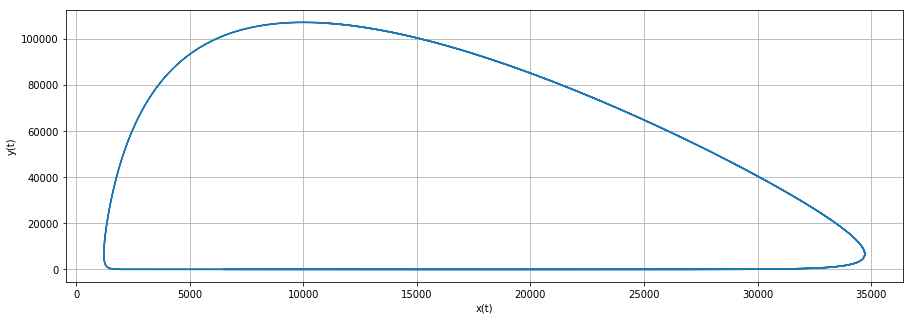

In [62]:
plt.plot(x[:, 0], x[:, 1])
plt.xlabel('x(t)')
plt.ylabel('y(t)')
plt.grid()